## Results: Tabular v. Graph-Based CPU Performance Models

In [1]:
import json
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path


In [2]:
RESULT_DIR = Path("../results")


def read_json(path: Path):
    with open(path, "r") as file:
        return json.load(file)
    
rows = []

# tabular baseline models
tab_path = RESULT_DIR / "tab_results.json"
tab = read_json(tab_path)
rows.extend(tab if isinstance(tab, list) else [tab])

# GraphSage
gnn_path = RESULT_DIR / "gnn_results.json"
gnn = read_json(gnn_path)
rows.append(gnn)

# GraphTransformer
tr_path = RESULT_DIR / "transf_results.json"
tr = read_json(tr_path)
rows.append(tr)

In [3]:
df = pd.DataFrame(rows)

cols = [c for c in ["model", "accuracy", "macro_f1", "best_val_accuracy"] if c in df.columns]

df = df[cols].copy()

df.sort_values("accuracy", ascending=False, inplace=True)
df

,model,accuracy,macro_f1,best_val_accuracy
1,RandomForest,0.989910,0.989913,NaN
2,GraphSAGE,0.978700,0.978741,0.97619
3,GraphTransformer,0.958520,0.958714,NaN
0,LogisticRegression,0.947309,0.947589,NaN


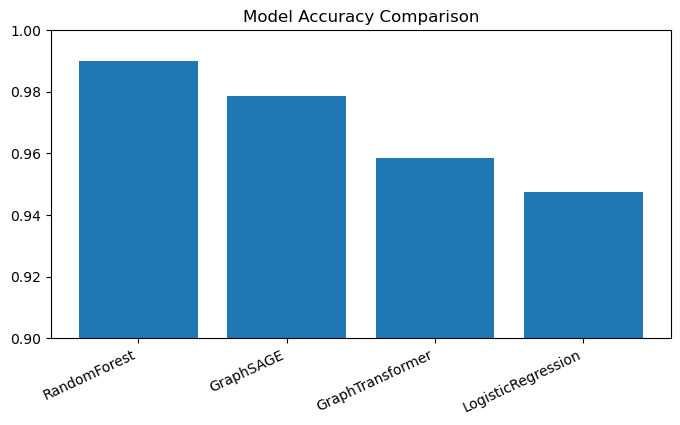

<Figure size 640x480 with 0 Axes>

In [4]:
ACC_PLOT = Path("../results/figures/acc_plot.png")

# Plotting accuracy
plt.figure(figsize=(8,4))
plt.bar(df["model"], df["accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1)
plt.xticks(rotation=25, ha="right")
plt.show()
plt.savefig(ACC_PLOT)

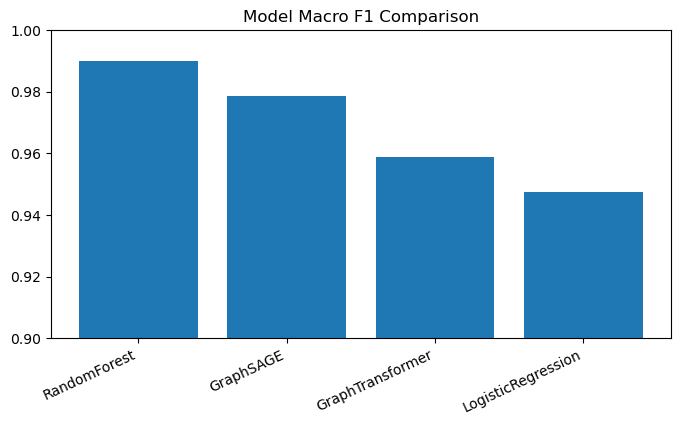

<Figure size 640x480 with 0 Axes>

In [5]:
F1_PLOT = Path("../results/figures/f1_plot.png")

# plotting F1 Scores
plt.figure(figsize=(8,4))
plt.bar(df["model"], df["macro_f1"])
plt.title("Model Macro F1 Comparison")
plt.ylim(0.9, 1)
plt.xticks(rotation=25, ha="right")
plt.show()
plt.savefig(F1_PLOT)

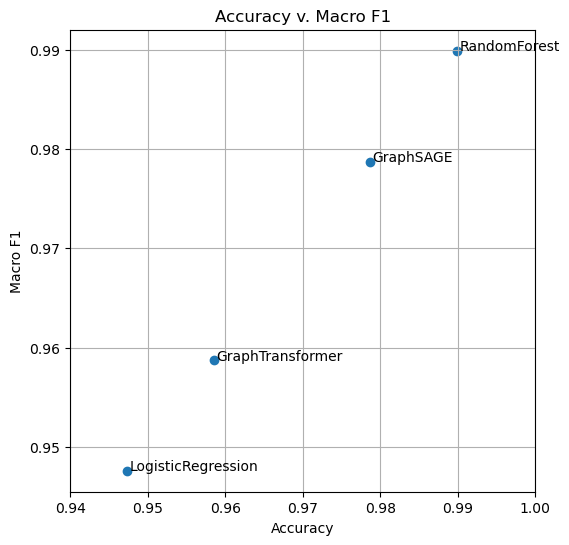

<Figure size 640x480 with 0 Axes>

In [6]:
AVF_PLOT = Path("../results/figures/avf_plot.png")

# scatterplot of accuracy v. macro f1
plt.figure(figsize=(6,6))
plt.scatter(df["accuracy"], df["macro_f1"])

for _, row in df.iterrows():
    plt.text(row["accuracy"] + 0.0003, row["macro_f1"], row["model"])

plt.xlabel("Accuracy")
plt.ylabel("Macro F1")
plt.title("Accuracy v. Macro F1")
plt.xlim(0.94, 1.0)
plt.grid(True)
plt.show()
plt.savefig(AVF_PLOT)

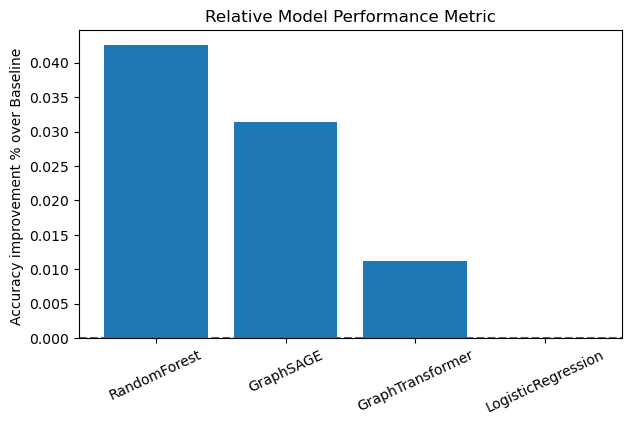

<Figure size 640x480 with 0 Axes>

In [7]:
IMPR_PLOT = Path("../results/figures/impr_plot.png")
# Relative model improvements metric
baseline_acc = df.loc[df["model"] == "LogisticRegression", "accuracy"].values[0]

df["acc_gain"] = df["accuracy"] - baseline_acc

plt.figure(figsize=(7,4))
plt.bar(df["model"], df["acc_gain"])
plt.axhline(0, linestyle="--")
plt.ylabel("Accuracy improvement % over Baseline ")
plt.title("Relative Model Performance Metric")
plt.xticks(rotation=25)
plt.show()
plt.savefig(IMPR_PLOT)

In [9]:
x = np.load("../data/processed/graph/x.npy")
edge_index = np.load("../data/processed/graph/i_edge.npy")

num_nodes = x.shape[0]

degs = np.bincount(edge_index[0], minlength=num_nodes)

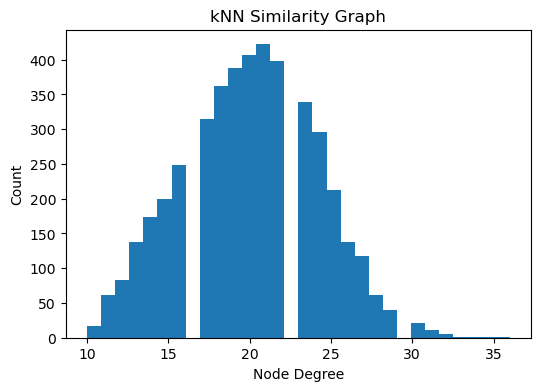

np.float64(20.0)

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(degs, bins=30)
plt.xlabel("Node Degree")
plt.ylabel("Count")
plt.title("kNN Similarity Graph")
plt.show()



The kNN Similarity Graph displays a narrow degree distribution around 20, reflecting the use of a bidirectional kNN construction. Most nodes have comparable neighborhood sizes, indicating a well=balanced graph without extreme hubs or isoalted nodes. this structure is apppropiate for neighborhood aggregation and attention-based GNN models.

## Summary

- Out of the four models tested, **Random Forest** displays the highest performance. This indicates that CPU performance tiers are explained by tabular features' nonlinear interactions
- **GraphSAGE** outperforms the baseline **Logistic Regression**, 
- Graph-based models remain competitive but fall short of Random Forest, which is expected given 
- Overall, these results demonstrate that GNNs can match strong baselines in certain structured settings, but their benefits are most significant in scenarios with inadequate features.

